# The Sparks Foundation GRIP: Data Science & Business Analytics Internship  

# Task 1:Prediction using Supervised ML
 

# By- NIKHIL DUBEY

# Import required libraries

In [1]:
#Libraries to be used are imported here
#Pandas and Numpy for handling mathematical operations as well as multi dimensional arrays
#Matplotlib and Seaborn for plotting graphs and charts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data is Loaded 

In [2]:
#Data is loaded as dataframe with the help of pandas
#df stores the data as a dataframe
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

# Exploratory Data Analysis

In [3]:
#To check top 3 rows of data
df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [4]:
#To check bottom 3 rows of data
df.tail(3)

,Hours,Scores
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#To check the statistical information of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#To check the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data Visualization

[Text(0.5, 1.0, 'Student Score')]

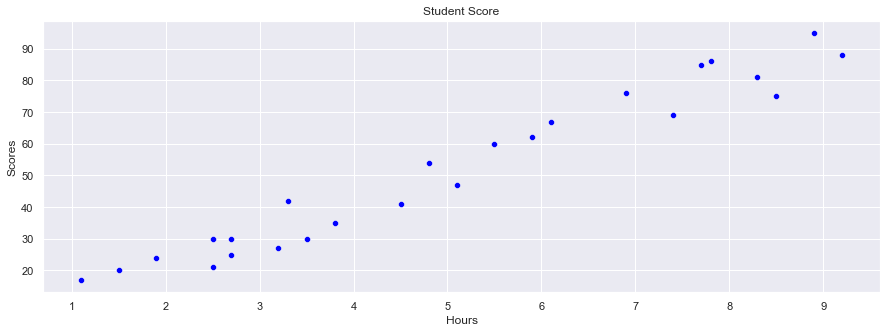

In [7]:
#Using seaborn a scatter plot is plotted to visualize the data and its pattern
sns.set(rc = {'figure.figsize':(15,5)})
sns.scatterplot(x="Hours",y="Scores",data=df,color="blue").set(title='Student Score')

The Scores are increasing with increase in the Hours

[Text(0.5, 1.0, 'Student Score')]

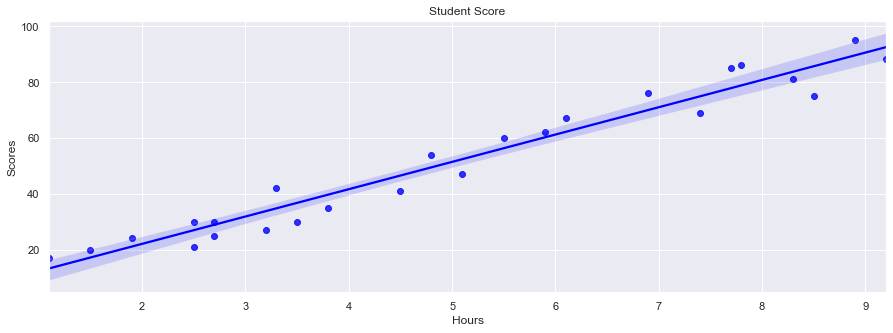

In [8]:
#Regression line is plotted using seaborn to get the best fit line on the graph
sns.set(rc = {'figure.figsize':(15,5)})
sns.regplot(x="Hours",y="Scores",data=df,color="blue").set(title='Student Score')

From the above plot it is clear that there exists a linear relation between the Hours and the Scores

# Correlation check

In [9]:
#To check the the correlation between the study hours and the score
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


It is observed that there is a strong postive correlation between the Hours and the Score

# Train-Test Splitting of Data

In [10]:
#Here the data is divided into two parts x which is the feature(Hours) and y which is the Target(Score) to be predicted
x=df.iloc[:, :1].values
y=df.iloc[:, 1:].values

In [11]:
#have a look at first 5 x values
x[0:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [12]:
#have a look at first 5 y values
y[0:5]

array([[21],
       [47],
       [27],
       [75],
       [30]], dtype=int64)

In [13]:
#From Scikit learn train test split is imported for training testing and splitting purpose
#Data is splitted into train and test set where test set consist of 20% of the total data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model :Linear Regression

In [14]:
#From Scikit learn Linear Regression Model is imported to do the prediction
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
#Check the shape of train set
x_train.shape

(20, 1)

In [16]:
#Check the shape of train set
y_train.shape

(20, 1)

In [17]:
#Check the shape of test set
x_test.shape

(5, 1)

In [18]:
#Check the shape of test set
y_test.shape

(5, 1)

# Prediction of test set

In [19]:
#prediction is done on the test set
y_pred=model.predict(x_test)

In [20]:
#Test set predicted values
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [21]:
#Test set Actual values
y_test

array([[81],
       [30],
       [21],
       [76],
       [62]], dtype=int64)

# Prediction of Score for 9.25 Hours/Day

In [22]:
#Value to be predicted is taken as hr and fitted into the model to get the predicted score
hr=9.25
Score_predict=model.predict([[hr]])
print("The predicted score for",hr, "hours is",Score_predict[0])

The predicted score for 9.25 hours is [92.38611528]


# Result- The Predicted Score for 9.25 Hours of Study is 92.386

# Model Evaluation

In [23]:
#To evaluate our model Mean Squared Error is imported from sk learn
#Then root mean squared error ic checked
from sklearn.metrics import mean_squared_error
score_predictiction= model.predict(x_train)
mse = mean_squared_error(y_train, score_predictiction)
rmse = np.sqrt(mse)

In [24]:
rmse

5.608461065868858

RMSE value of 5.60 shows the error in our prediction values from the original values

In [25]:
#Using Cross validation to check rmse scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=8)
rmse_scores = np.sqrt(-scores)

In [26]:
rmse_scores

array([8.77317029, 5.33008397, 3.50093599, 5.65053132, 6.45086037,
       4.36181314, 4.49990948, 6.87276675])

In [27]:
rmse_scores.mean()

5.680008914135277

RMSE value along with cross validation is 5.68

# Thankyou 